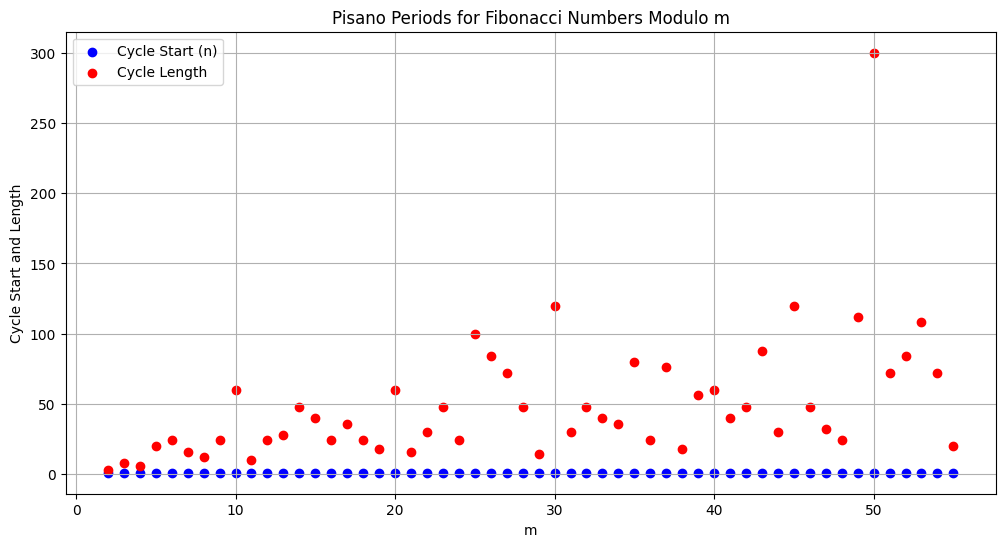


Results for Powers of 2:
m	Start (n-1, n)	F(n-1), F(n)	Cycle Length
2	(0, 1)	(0, 1)	3
4	(0, 1)	(0, 1)	6
8	(0, 1)	(0, 1)	12
16	(0, 1)	(0, 1)	24
32	(0, 1)	(0, 1)	48


In [2]:
import matplotlib.pyplot as plt

def pisano_period_brute_force(m):
    # Initialize the first two Fibonacci numbers
    a, b = 0, 1
    
    # Dictionary to store pairs and detect the cycle start
    seen_pairs = {}
    
    # Iterate until we find a cycle
    for n in range(1, m * m + 2):  # Upper bound is m^2 + 1
        current_pair = (a, b)
        
        # Hash the pair to detect a collision
        if current_pair in seen_pairs:
            cycle_start = seen_pairs[current_pair]
            cycle_length = n - cycle_start
            return cycle_start, cycle_length
        
        # Store the position of the current pair
        seen_pairs[current_pair] = n
        
        # Move to the next Fibonacci numbers
        a, b = b, (a + b) % m
    
    return None

def visualize_pisano_periods(max_m):
    m_values = []
    cycle_starts = []
    cycle_lengths = []

    for m in range(2, max_m + 1):
        start_n, cycle_length = pisano_period_brute_force(m)
        m_values.append(m)
        cycle_starts.append(start_n)
        cycle_lengths.append(cycle_length)
    
    # Scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(m_values, cycle_starts, label='Cycle Start (n)', color='blue')
    plt.scatter(m_values, cycle_lengths, label='Cycle Length', color='red')
    plt.xlabel('m')
    plt.ylabel('Cycle Start and Length')
    plt.title('Pisano Periods for Fibonacci Numbers Modulo m')
    plt.legend()
    plt.grid(True)
    plt.show()

def generate_powers_of_two_table(max_m):
    print("\nResults for Powers of 2:")
    print("m\tStart (n-1, n)\tF(n-1), F(n)\tCycle Length")
    for m in range(2, max_m + 1):
        if (m & (m - 1)) == 0:
            start_n, cycle_length = pisano_period_brute_force(m)
            a, b = 0, 1
            for _ in range(start_n - 1):
                a, b = b, (a + b) % m
            print(f"{m}\t({start_n - 1}, {start_n})\t({a}, {b})\t{cycle_length}")

if __name__ == "__main__":
    max_m = int(input("Enter the maximum value of m: "))
    visualize_pisano_periods(max_m)
    generate_powers_of_two_table(max_m)
